<a href="https://colab.research.google.com/github/leticiaplang/lpl_posts/blob/master/_notebooks/2022_03_14_drug_classification_pt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pt-BR | Drug Classification
> "Limpeza de dados, transformação de dados, insights para o negócio, algorítimo de classificação."

- toc: false
- branch: master
- badges: true
- comments: false
- categories: [fastpages, jupyter]
- hide: false
- author: leticiaplang

# Drug Classification

## Problema de Negócio

Uma das grandes dores dos serviços de saúde são os erros relacionados a medicamentos. De acordo com o artigo de Rayhan A. e colegas, os erros de pescrição e solicitação englobam 50% dos erros totais relacionamentos a medicamentos. O dano não ocorre apesas ao paciente, familiar ou aos profissionais, mas também à própria empresa, uma vez que são estimados gastos maiores a 40 bilhões de dólares por ano para o cuidado desses pacientes. Este algoritmo é o primeiro passo para a construção de um MVP (produto mínimo viável) visando auxílio para prescrição de medicamentos segura. Após, será realizada análise de dose, juntamente com a análise em uma amostra de tamanho maior.


## Visão Geral

* Este dataset foi retirado do Kaggle e você pode acessá-lo clicando [aqui](https://www.kaggle.com/prathamtripathi/drug-classification). 

* Este dataset engloba dados demográficos, condições de saúde (análise de exames laboratorias) e o tratamento precrito.

* O objetivo deste projeto é preizer qual droga deverá ser utilizada baseado nos atributos.

* Foi possível retirar alguns insights analisando os atributos 

* O algoritmo de classificação foi necessário para garantir a acurácia do resultado.

* O algoritmo de base utilizado com o Dummie classifier. 

* O algoritmo com melhor desempenho foi o de regressão logística. Pode ser utilizado como MVP.

* Próximos passos é realizar o tuning do modelo e features.

## Estrutura do Notebook (código em inglês)

* Preparando o ambiente
  - Instalações
  - Importações
  - Requisitos
  - Importação do dataset e transformação dele em dataframe
* Exploração do dataframe
  - Característica do dataframe
  - Transformações
  - Anaálise exploratória
  - Distribuição e balanceamento
  - análise de outlier
* Insights de negócio
* Modelagem
  - Engenharia de atributos
  - Definição de funções 
  - Criando cenários
  - Testando os cenários
* Conclusão e próximo passos
* Referências

## Preparando o ambiente

In [1]:
# Import
from google.colab import drive

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [2]:
# Acess the dataset by google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Create the dataframe
## Put your path here
df = pd.read_csv('drive/MyDrive/datasets/drug200.csv', sep = ',')

In [4]:
# Check the output
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Exlporando o dataframe

### Característica do dataframe

* Ele possui 200 linhas e 6 colnass
* Não foram identificados dados inconsistentes
* As variáveis numéricas são: 
   - Age | idade: 15 to 74 anos
   - Na to Potassium Ratio | razão sódio e potássio: 6.269 - 38.247 | Exame de urina | Altas razão significa consumo elevado de Sodio e menor de Potássio.
* As variáveis categóricas são:
   - Sex | sexo: F(feminino), M(masculino)
   - Blood Pressure Levels (BP) | pressão arterial: normal, low/baixa, high/alta
   - Cholesterol Levels | colesterol: normal, high/alto | exame de sangue
   - Drug | droga: a, b, c, x, y

In [5]:
# DF rows and columns
df.shape

(200, 6)

In [6]:
# Types & null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
# Duplicated data
df.duplicated().sum()

0

In [8]:
# Infos by columns 
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [9]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [10]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [11]:
# Basic statistics
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Transformações
* Texto transformado para letra minúscula
* Deletada a palavra 'drug' dos valores da coluna drug

In [12]:
# Columns name
df.columns = df.columns.str.lower()

In [13]:
# Columns data
col = ['sex', 'bp', 'cholesterol', 'drug']

In [14]:
# Lowercase transformation
for n in col:
  df[n] = df[n].apply(lambda x: x.lower())

In [15]:
# Drug essencial information
df['drug'] = [n[-1] for n in df['drug']]

In [16]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,f,high,high,25.355,y
1,47,m,low,high,13.093,c
2,47,m,low,high,10.114,c
3,28,f,normal,high,7.798,x
4,61,f,low,high,18.043,y


## Análise Exploratória

### Distribuição & Outlier

* Dados categóricos desbalanceados
* Age|idade - distribuição mais próxima de normal
* Na to K - assimetria à direita | Outlier parece estar associado ao uso da droga y

In [17]:
continuous_var = ['age', 'na_to_k']
categorical_var = ['sex', 'bp', 'cholesterol', 'drug']

##### Variáveis contínuas

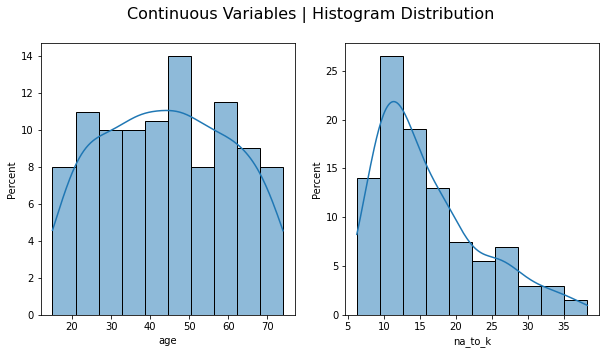

In [18]:
# General distribution | histogram for which variable
n_rows=1
n_cols=2

## Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
fig.suptitle('Continuous Variables | Histogram Distribution', fontsize=16)

## Creating histograms
for i, column in enumerate(continuous_var):
  sns.histplot(df[column], ax=axes[i%n_cols], bins=10,  stat="percent", kde=True)

plt.show()

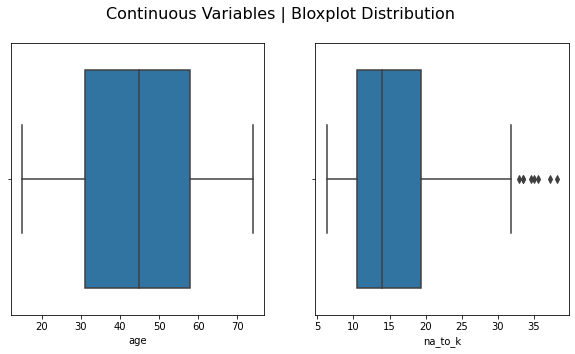

In [19]:
# General distribution | boxplot for which variable
n_rows=1
n_cols=2

## Creating subplots
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(10, 5)
fig.suptitle('Continuous Variables | Bloxplot Distribution', fontsize=16)

## Creating boxplot
for i, column in enumerate(continuous_var):
  sns.boxplot(df[column], ax=axes[i%n_cols])

plt.show()

In [20]:
# analysing outliers >> high na_to_k == drug Y(?)
def outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  return df[((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [21]:
outliers(df, 'na_to_k')

,age,sex,bp,cholesterol,na_to_k,drug
24,33,f,low,high,33.486,y
96,58,f,low,high,38.247,y
98,20,m,high,normal,35.639,y
128,47,m,low,normal,33.542,y
131,52,m,low,normal,32.922,y
184,18,f,high,high,37.188,y
188,65,m,high,normal,34.997,y
194,46,f,high,high,34.686,y


#### Categorical variables

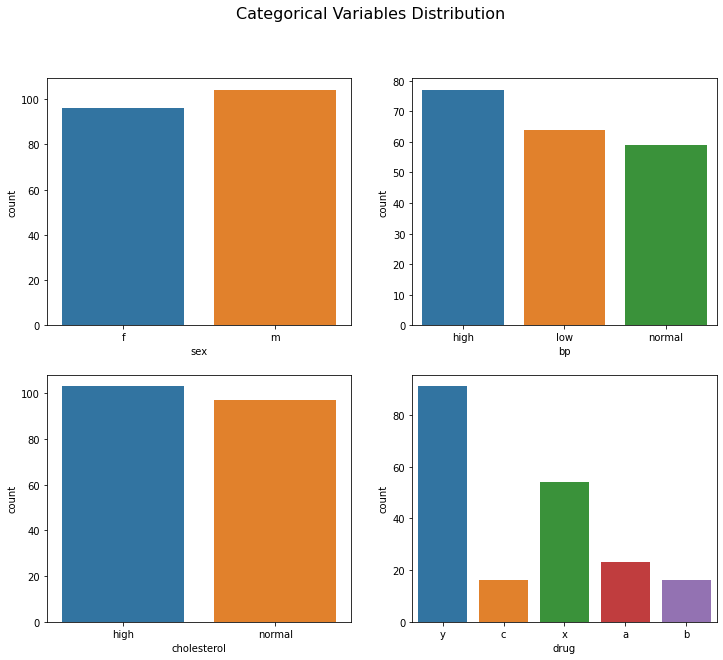

In [22]:
# General distribution | countplot for which variable
n_rows=2
n_cols=2
warnings.filterwarnings("ignore")

## Creating subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(12, 10)
fig.suptitle('Categorical Variables Distribution', fontsize=16)

## Creating boxplot
for i, column in enumerate(categorical_var):
  sns.countplot(df[column], ax=axes[i//n_cols,i%n_cols])

plt.show()

### Insights de negócio

* É possível prescrever corretamente as drogas??

* Informações retiradas da análise de dados:
              || Drug A | Drug B | Drug C | Drug X | Drug Y |

      |  Age  ||  < 50  |  > 50  |        |        |        |
      |  Sex  ||        |        |        |        |        |
      |  BP   ||  high  |  high  |  low   |norm/low|        |
      |  Chol ||        |        |  high  |        |        |
      |  Na_K ||  < 15  |  < 15  |  < 15  |  < 15  |  > 15  |

* Idade e sexo sem insights. Serão features importantes para a nálise?

In [23]:
# Grouping the features
cont_feature = ['age', 'na_to_k']
cat_feature = ['sex', 'bp', 'cholesterol']


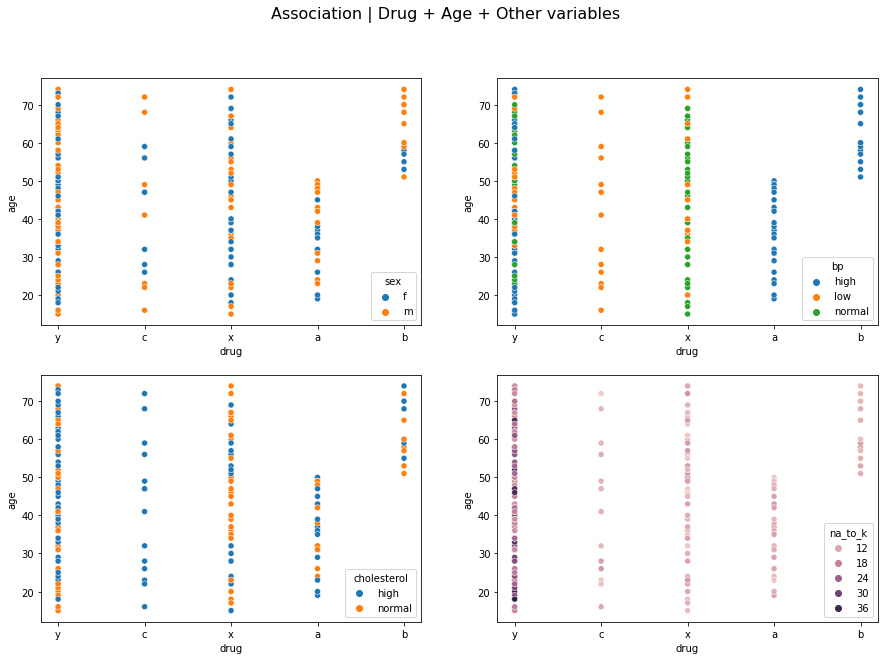

In [24]:
# Analysing target and age with others variables
n_rows=2
n_cols=2
X = 'drug'
Y = 'age'
H = ['sex', 'bp', 'cholesterol', 'na_to_k']

## Subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 10)
fig.suptitle('Association | Drug + Age + Other variables', fontsize=16)

for i, H in enumerate(df[H]):
  sns.scatterplot(x=X, y=Y, hue=H, data=df, ax=axs[i//n_cols,i%n_cols])

plt.show()

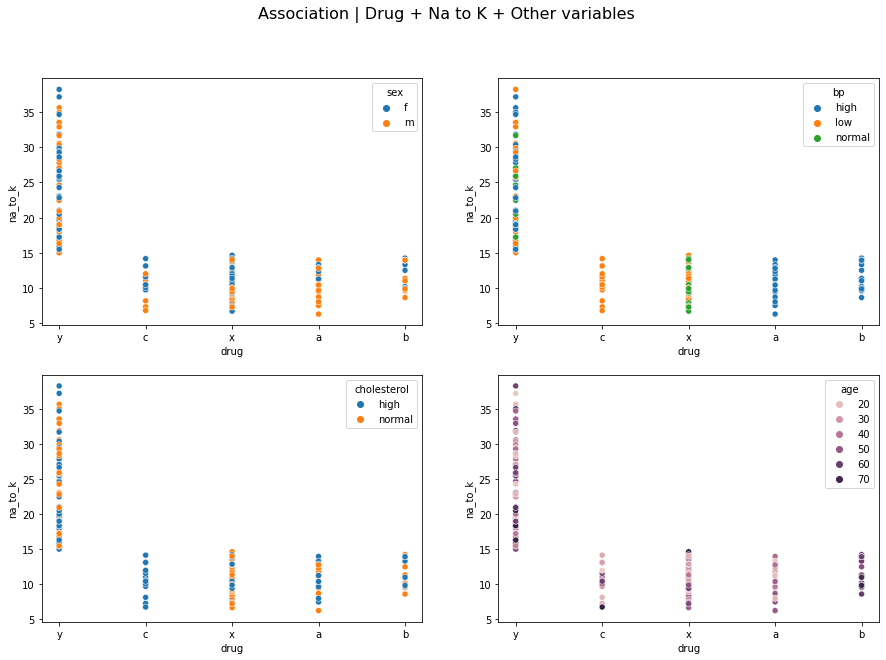

In [25]:
# Analysing target and na_to_k with others variables
n_rows=2
n_cols=2
X = 'drug'
Y = 'na_to_k'
H = ['sex', 'bp', 'cholesterol', 'age']

## Subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 10)
fig.suptitle('Association | Drug + Na to K + Other variables', fontsize=16)

for i, H in enumerate(df[H]):
  sns.scatterplot(x=X, y=Y, hue=H, data=df, ax=axs[i//n_cols,i%n_cols])

plt.show()

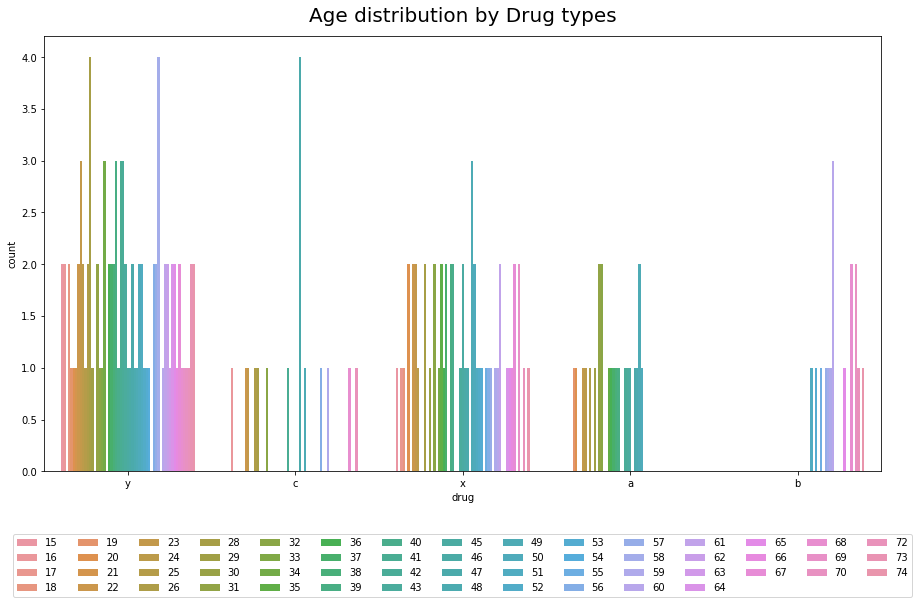

In [26]:
# Age frequency / drug type
plt.figure(figsize=(15,8))
plt.title("Age distribution by Drug types", fontsize=20, y=1.02)
sns.countplot(hue = df.age, x = df.drug)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=15)
plt.show()

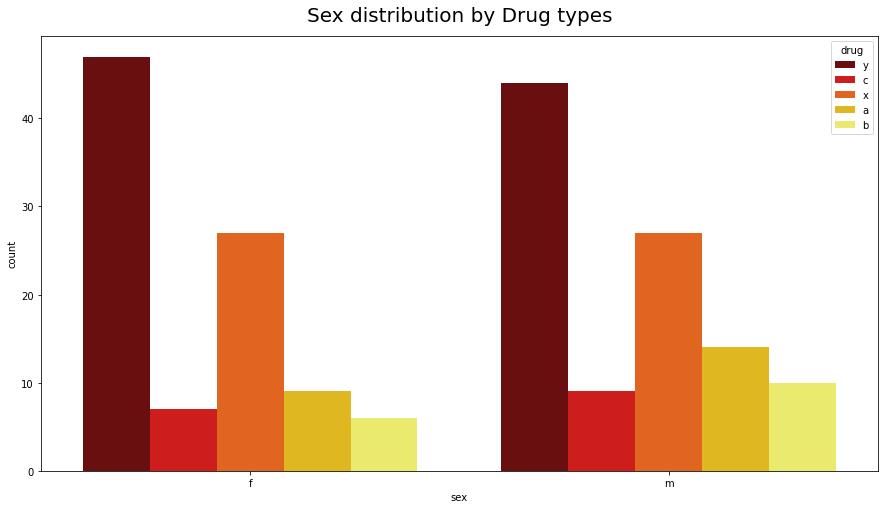

In [27]:
# Sex frequency / drug type
plt.figure(figsize=(15,8))
plt.title("Sex distribution by Drug types", fontsize=20, y=1.02)
sns.countplot(x = df.sex, hue = df.drug, palette="hot")
plt.show()

## Modelagem
* Os insights nõa permitem definir com precisão quais drogas podem ser utilizadas conforme os atributos.
* Este é um problema de c;assificação que possui:
  * Alvo: Drug|droga
  * Atributos contínuas: Age|idade and Na_to_K|razão Na e K
  * Atributos Categóricos: Sex|sexo, Bp|pressão arterial, Cholesterol|colesterol

#### engenharia de atributos

* Transformando o alvo e os atributos com label enconder
        |  sex  |  drug  |   bp   | cholesterol |
      0 |   f   |    a   |  low   |    normal   |
      1 |   m   |    b   | normal |     high    |
      2 |       |    c   |  high  |
      3 |       |    x   |
      4 |       |    y   |

In [28]:
# Label enconding

## Variables
le = LabelEncoder()
bp = ['low', 'normal', 'high'] #To define the label order
chol = ['normal', 'high'] #To define the label order


## Fit transform | columns sex & drug
for c in ['sex', 'drug']:
  df[c] = le.fit_transform(df[c])
  
## fit transform | column blood pressure
le.fit(df['bp'])
le.classes_ = np.array(bp) #Specifying the label order
df['bp'] = le.transform(df['bp'])

## fit transform | column cholesterol
le.fit(df['cholesterol'])
le.classes_ = np.array(chol) #Specifying the label order
df['cholesterol'] = le.transform(df['cholesterol'])


In [29]:
df.head()

,age,sex,bp,cholesterol,na_to_k,drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


### Definção das funções

In [30]:
# Creating a function which create scenarios with all situations defined

def create_scenarios(features, scalling, outlier, rebalance, algorithm):
  ''' It combines de list of strings from variables to create 
  differents scenarios to run de model.
  Input: variables separated by coma. Each variable contains a list of strings.
        if there are no situation in some variable, insert 'none'. 
  Output: a variable called 'scenarios' which contains a list of dictionary. '''

  # Creating scenarios/combinations
  global scenarios 
  scenarios = []
  for f in features:
    for a in algorithm:
      scenario = {'features': f,
                  'algorithm': a,
                 }
      scenarios.append(scenario)
  print(f'There are {len(scenarios)} possible scenarios.')

In [31]:
## Creating a function which runs the functions for each scenario

def run_model(df, scenario, target):
  '''
  Function to run the selected scenario.
  Input: dataframe,
         variable 'scenario'
  Output: return the scenario analysed and the metrics.
  '''
  results = []

  # Running each scenario
  for n in range(5000):  
    if scenario['features'] == 'all':
      dft = df

    ## Split train & test0
    X = dft.drop(columns = target)
    y = dft[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    ## algorithm
    if scenario['algorithm'] == 'dummy':
      model = DummyClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'logistic':
      model = LogisticRegression() 
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'knn':
      model = KNeighborsClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'tree_clas':
      model = DecisionTreeClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
    elif scenario['algorithm'] == 'random':
      model = RandomForestClassifier()
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)

    ## Metrics & append
    results.append({'Scenario': scenario,
                    'Accuracy': accuracy_score(y_test, y_pred), 
                    'Precision': precision_score(y_test, y_pred, average='weighted'),
                    'Recall': recall_score(y_test, y_pred, average='weighted'),
                    'F1-score': f1_score(y_test, y_pred, average='weighted')})
  return results


In [42]:
## Creating funtion to histogram of metrics

def hist_model(scen):
  ''' 
  Funtion to return a histogram of model''s metrics:
  Accuracy, Precision, Recall, F1-score.
  Scen is the model's result transformed into dataframe.
  '''
  # Ploting a histogram to analyse the medium value
  n_rows = 2
  n_cols = 2

  # Creating the figure
  fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols)
  fig.set_size_inches(7, 7)
  fig.suptitle(scenario, fontsize=16)

  ## Creating histograms
  axs[0,0].hist(scen['Accuracy'])
  axs[0,0].set_title('Accuracy')
  axs[0,1].hist(scen['Precision'])
  axs[0,1].set_title('Precision')
  axs[1,0].hist(scen['Recall'])
  axs[1,0].set_title('Recall')
  axs[1,1].hist(scen['F1-score'])
  axs[1,1].set_title('F1-score')

  plt.show()

### Criando os cenários

In [32]:
# Defining variables
features = ['all']
outlier = ['none']
scalling = ['none']
rebalance = ['none']
algorithm = ['dummy', 'logistic', 'knn', 'tree_clas']
target = ['drug']

In [33]:
create_scenarios(features, scalling, outlier, rebalance, algorithm)

There are 4 possible scenarios.


### Testando os cenários

* Algoritmo de base == Dummy

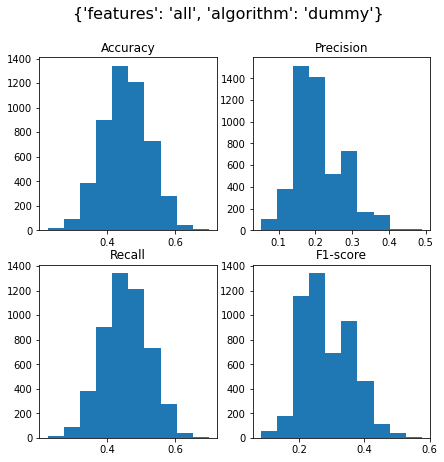

In [43]:
# SCENARIO 01

## Runnig the model
scenario = scenarios[0]
warnings.filterwarnings("ignore")
scen_0 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_0 
hist_model(scen)



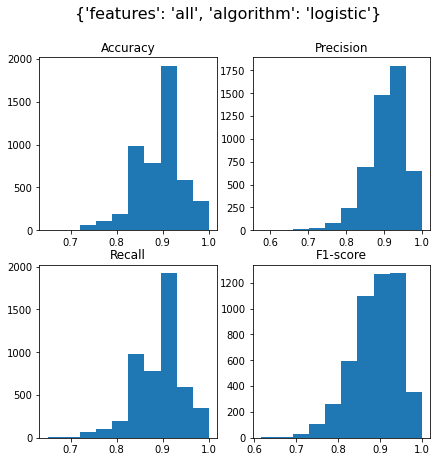

In [45]:
# SCENARIO 02

## Runnig the model
scenario = scenarios[1]
warnings.filterwarnings("ignore")
scen_1 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_1 
hist_model(scen)

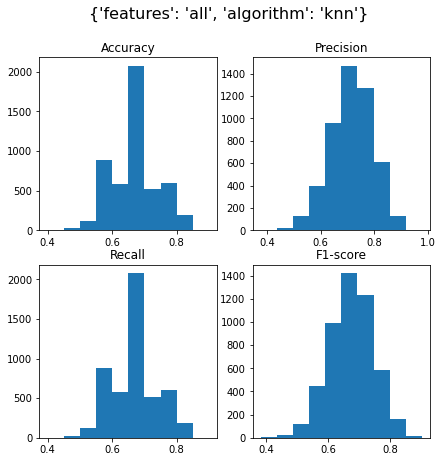

In [49]:
# SCENARIO 03

## Runnig the model
scenario = scenarios[2]
warnings.filterwarnings("ignore")
scen_3 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_3
hist_model(scen)

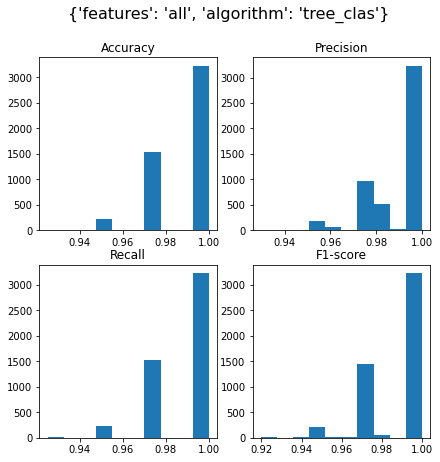

In [47]:
# SCENARIO 04

## Runnig the model
scenario = scenarios[3]
warnings.filterwarnings("ignore")
scen_4 = pd.DataFrame(run_model(df, scenario, target))

## Calling hist_model
scen = scen_4
hist_model(scen)

In [48]:
# Metrics from the better result >> logistic regression
scen_1.mean()

Accuracy     0.891735
Precision    0.906807
Recall       0.891735
F1-score     0.889584
dtype: float64

## Conclusões e próximos passos
* O modelo com melhor performance foi regressão logística
* Este modelo pode prever corretamente o medicamento dado no tratamento em 89% das vezes
* Ele identifica menos falsos positivos(precision) e um pouco mais dos false negativos(recall)
* Este é um ótimo resultado para um MVP 😃
* Para melhor perfomar, deve-se realizar o tuning do modelo e atributos. Além de coletar mais dados e inserir dosagem dos medicamentos.